In [1]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np 

In [8]:
tokenizer = Tokenizer()
#!wget --no-check-certificate \
#    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
#    -O /tmp/sonnets.txt
data = open('poem.txt',"r", errors="ignore").read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

In [9]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150, return_sequences = True)))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 996, 100)          93900     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 996, 300)          301200    
_________________________________________________________________
dropout_1 (Dropout)          (None, 996, 300)          0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense_2 (Dense)              (None, 469)               47369     
_________________________________________________________________
dense_3 (Dense)              (None, 939)               441330    
Total params: 1,044,199
Trainable params: 1,044,199
Non-trainable params: 0
____________________________________________

In [14]:
#More epochs will help model to train better, but due to machine's incapibility I cannot. But running it over GPU will help for sure.
history = model.fit(predictors, label, epochs=10, verbose=1)

Train on 2987 samples
Epoch 1/10
2987/2987 [==============================] - 5809s 2s/sample - loss: 5.9994 - accuracy: 0.0278
Epoch 2/10
2987/2987 [==============================] - 52874s 18s/sample - loss: 5.8052 - accuracy: 0.0281
Epoch 3/10
2987/2987 [==============================] - 6396s 2s/sample - loss: 5.7178 - accuracy: 0.0325
Epoch 4/10
2987/2987 [==============================] - 8284s 3s/sample - loss: 5.6322 - accuracy: 0.0412
Epoch 5/10
2987/2987 [==============================] - 5433s 2s/sample - loss: 5.5433 - accuracy: 0.0492
Epoch 6/10
2987/2987 [==============================] - 5200s 2s/sample - loss: 5.4745 - accuracy: 0.0502
Epoch 7/10
2987/2987 [==============================] - 7714s 3s/sample - loss: 5.4183 - accuracy: 0.0532
Epoch 8/10
2987/2987 [==============================] - 49510s 17s/sample - loss: 5.3731 - accuracy: 0.0549
Epoch 9/10
2987/2987 [==============================] - 6058s 2s/sample - loss: 5.3406 - accuracy: 0.0583
Epoch 10/10
2987/298

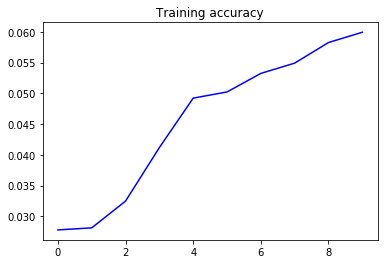

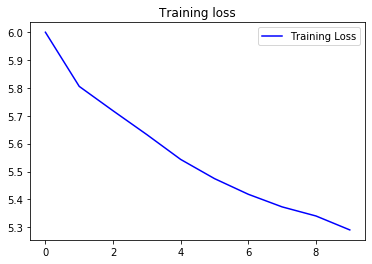

In [20]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [21]:
seed_text = "I love what I have seen"
next_words = 10
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

I love what I have seen you a person of person of person of person and
